In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/uncontrollable_sample.csv', index_col='id')

In [3]:
df

,idpop_local_sum,idpop_citywide_sum,idpop_local_food_sum,idpop_citywide_food_sum,idpop_local_nightlife_sum,idpop_citywide_nightlife_sum,idpop_local_travel_sum,idpop_citywide_travel_sum,venue_count_500m,sub_cnt_20m,...,neighbourhood_West Village,neighbourhood_Westchester Village,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
id,,,,,,,,,,,,,,,,,,,,,
33699563.0,7.992767,0.803436,7.157023,0.805422,13.380945,0.630482,7.921177,0.630585,44,4,...,0,0,0,0,0,0,0,0,0,0
16585605.0,0.000769,0.739474,0.000769,0.608763,0.000769,0.752475,0.000769,0.892192,6,1,...,0,0,0,0,0,0,0,0,0,0
31767505.0,24.897783,2.047967,27.071885,2.982674,11.118003,1.365497,21.060435,2.646382,78,12,...,0,0,0,0,0,0,0,0,0,0
1655390.0,2.110251,0.568449,2.446163,0.568007,1.857215,0.577803,2.622797,0.551869,1,1,...,0,0,0,0,0,0,0,0,0,0
10615883.0,10.972633,0.684232,4.148196,0.725314,6.891011,0.619826,3.914252,0.598249,6,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22262408.0,5.829253,1.369904,6.684054,2.193832,6.926720,1.982051,4.093179,1.347117,36,1,...,0,0,0,0,0,0,0,0,0,0
66451.0,0.003413,0.867147,0.004233,0.964085,0.003113,0.822118,0.004291,0.768899,12,2,...,0,0,0,0,0,0,0,0,0,0
26337253.0,3.743130,0.330455,5.096838,0.314299,4.078022,0.327557,5.122994,0.324630,7,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Label'])
Y = df['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [94]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=50, min_samples_split=100)
dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

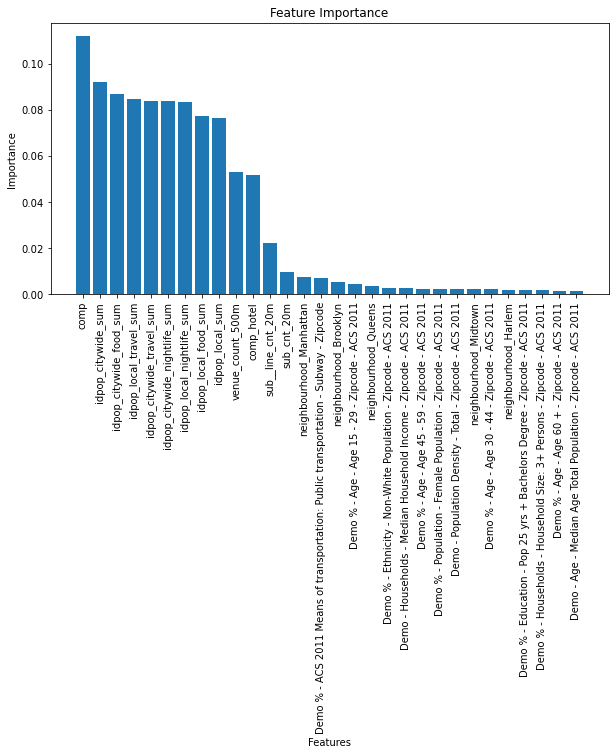

In [95]:
#Get feature importances
feature_mi = dt.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(X_train.columns.values[featureinds[::-1][0:30]],feature_mi[featureinds[::-1][0:30]])
plt.xticks(X_train.columns.values[featureinds[::-1][0:30]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

In [96]:
from sklearn.metrics import accuracy_score

#Make predictions for both training and test data
predictions_train=dt.predict(X_train)
predictions_test=dt.predict(X_test)

#Compute accuracies
train_accuracy=accuracy_score(Y_train,predictions_train)
test_accuracy=accuracy_score(Y_test,predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 1.0
Test Accuracy is 0.5343796711509716


In [97]:
min_samples_split_values = np.arange(2,3500,350)
min_samples_leaf_values = np.arange(1,200,20)

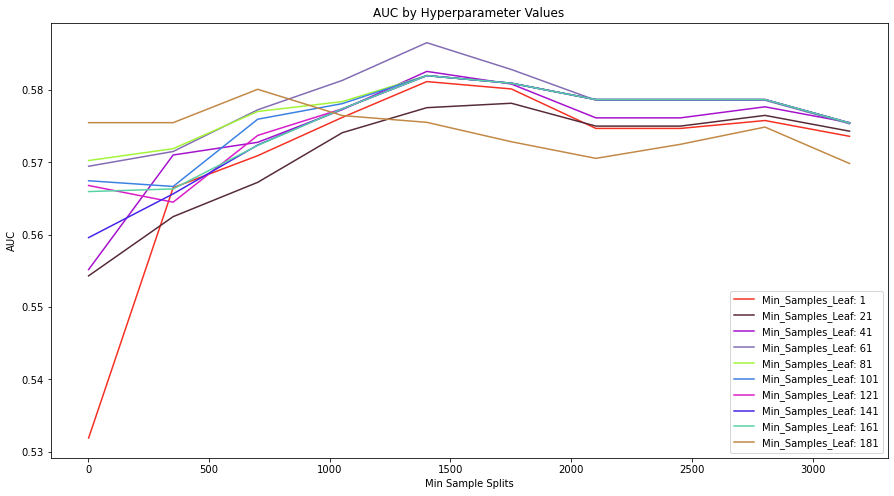

In [163]:
plt.figure(figsize=(15,8))
accuracies = dict()
aucs = dict()
#Go through each min leaf values
for leaf in min_samples_leaf_values:
    accuracies[leaf] = np.zeros(10)
    aucs[leaf] = np.zeros(10)
    #Go through each min split values
    for i, split in enumerate(min_samples_split_values):
        #build and fit a new decision tree with current hyperparameters
        dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=leaf, min_samples_split=split)
        dt.fit(X_train, Y_train)
        
        #Add accuracies to the dictionary
        accuracies[leaf][i] = accuracy_score(Y_test,dt.predict(X_test))
        predictions_dt = dt.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
        aucs[leaf][i] = metrics.auc(fpr,tpr)
        
    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    
    #Plot the accuracies for this leaf value with minimum split values on the x axis
    plt.plot(min_samples_split_values, aucs[leaf], color = c, label = "Min_Samples_Leaf: " + str(leaf))

#Add some finishing touches
plt.legend()
plt.xlabel('Min Sample Splits')
plt.ylabel('AUC')
plt.title('AUC by Hyperparameter Values')
plt.show()

In [164]:

max_accuracy = 0
max_auc = 0
max_leaf = 0
max_split = 0

#Loop through the dictionary to find which combination gives us the highest accuracy
for leaf in accuracies.keys():
    for i, split in enumerate(min_samples_split_values):
        if aucs[leaf][i] > max_auc:
            max_auc = aucs[leaf][i]
            max_leaf = leaf
            max_split = split

#print the highest Accuracy and Relevant Configuration            
print("Max AUC: " + str(max_auc))
print("Best Minimum Leaf Size: " + str(max_leaf))
print("Best Minimum Samples for Split: " + str(max_split))

Max AUC: 0.5865431538797775
Best Minimum Leaf Size: 61
Best Minimum Samples for Split: 1402


In [102]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=60, min_samples_split=1400)
#dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

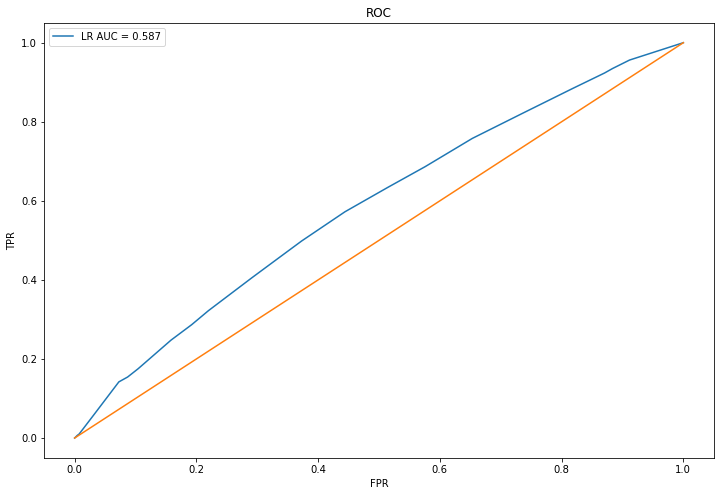

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "LR AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

(4014,)

## Using GridSearch

In [104]:
# importing libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [105]:
# Creating an standardscaler object
std_slc = StandardScaler()

In [143]:
# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

In [144]:
# Creating a pipeline of two steps. First, standardizing the data.
# Second, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [145]:
    # Creating lists of parameter for Decision Tree Classifier
    criterion = ['gini']
    min_samples_split_values = np.arange(2,3500,350)
    min_samples_leaf_values = np.arange(1,200,20)
    

    # Creating a dictionary of all the parameter options 
    # Note that we can access the parameters of steps of a pipeline by using '__’
    parameters = dict(dec_tree__criterion=criterion,
                     dec_tree__min_samples_leaf=min_samples_leaf_values,
                     dec_tree__min_samples_split=min_samples_split_values)

In [146]:
    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
    clf_GS = GridSearchCV(pipe, parameters, scoring='roc_auc')

    # Fitting the grid search
    clf_GS.fit(X_train, Y_train)

    # Viewing The Best Parameters
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
    print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best mi_samples_leaf: 181
Best mi_samples_split: 702

DecisionTreeClassifier(min_samples_leaf=181, min_samples_split=702)


In [147]:
clf_GS.best_score_

0.5681683178212112

In [116]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

In [165]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=60, min_samples_split=1400)
fit = dt.fit(X_train, Y_train)

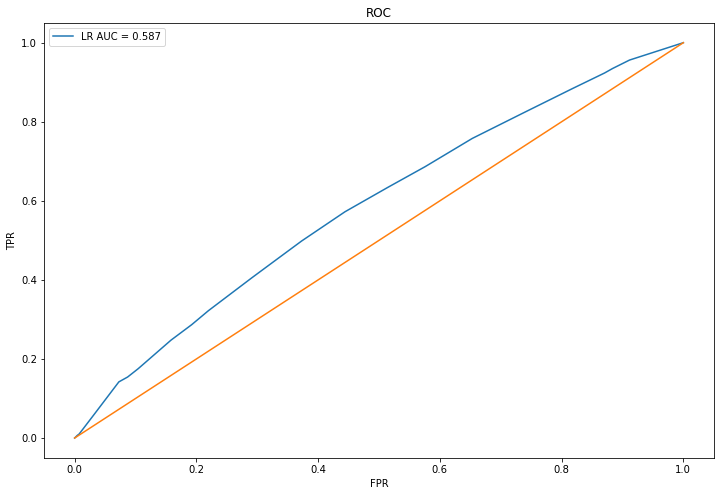

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "LR AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()